# Pràctica 2: Neteja i validació de les dades

# Anàlisis del Data Set "Red Wine Quality"

<br>
<strong>Autors</strong>: 
<ul>
    <li>Xavier Alperte Pérez-Rejón</li>
</ul>

In [309]:
import warnings
warnings.filterwarnings('ignore')

## 1. Descripciò del Data set

Aquest dataset està composat per un conjunt de camps que intenten respondre __quines característiques dels vins son les que més incideixen en la qualitat del vi__.

Les característiques capturades dels vins son les següents:
- __Fixed Acidity__: la majoria dels àcids implicats en la elaboració del vi son fixes o no volàtils. Son àcids que no s’evaporen fàcilment, i que per tant perduren més en el temps.
- __Volatile Acidity__: la quantitat d’àcid acètic en el vi, que a massa nivells pot portar a un gust desagradable del vinagre.
- __Citric Acid__: l’àcid cítric es troba en petites quantitats, i pot afegir frescor i gust als vins.
- __Residual sugar__: fa referencia a la quantitat de sucre restant després de la fermentació, és rar trobar vins amb menys d’un gram per litre, i els vins amb més de 45 grams per litre es consideren dolços.
- __Chlorides__: la quantitat de sal al vi.
- __Free sulfur dioxide__: la quantitat de diòxid de sofre lliure al vi. La forma lliure del SO2 existeix en equilibri entre el SO2 molecular (com un gas dissolt) i el ion bisulfit; que impedeix el creixement microbial i l’oxidació del vi.
- __Total sulfur dioxide__: quantitat total de diòxid de sofre, quantitat de formes lliures i limitades de SO2; en baixes concentracions, el SO2 no es pot detectar en el vi, però a concentracions de SO2 lliures superiors a 50 ppm, SO2 es fa evident al nas i al gust del vi.
- __Density__: la densitat de l’aigua es pròxima a la de l’aigua en funció del percentatge d’alcohol i el contingut de sucre.
- __pH__:  el pH descriu com és un vi àcid o bàsic en una escala del 0 (molt àcid) a 14 (molt bàsic); la majoria dels vins són entre 3 i 4 en l’escala de pH.
- __Sulphates__: un additiu vitivinícola que pot contribuir als nivells de gas de diòxid de sofre (SO2), que actua com a antimicrobià i antioxidant.
- __Alcohol__: el percentatge de contingut d’alcohol del vi.
- __Quality__: variable de sortida (basada en dades sensorials, puntuació entre 0 i 10)

## 2. Cárrega de les dades.

Descarreguem l'arxiu CSV disponible a [Kaggle.com](https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009/version/2) i l'obrim amb Pandas. 

Mostrem només els 10 primers registres.


In [147]:
import pandas as pd
wines_df = pd.read_csv("winequality-red.csv",
                       error_bad_lines=True,
                       warn_bad_lines=True,
                       skip_blank_lines=True)

# Obtenim els tipus de les columnes
wines_data_types = pd.DataFrame(wines_df.dtypes, columns=['Data Type'])

wines_df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


Fem una breu descripció dels valors que pren cada variable.

In [148]:
wines_df.describe().transpose().join(wines_data_types)

,count,mean,std,min,25%,50%,75%,max,Data Type
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000,float64
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000,float64
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000,float64
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000,float64
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100,float64
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000,float64
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000,float64
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369,float64
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000,float64
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000,float64


Tots els camps son numèrics, les propietats mesurades son valors numèrics continus i la variable de sortida __quality__ es entera/discreta.



### 2.1 Discretització del camp quality

El camp __quality__ es més un camp categòric que numèric, amb valors discrets entre 3 i 8.


In [149]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import numpy as np
import seaborn as sns

%matplotlib inline

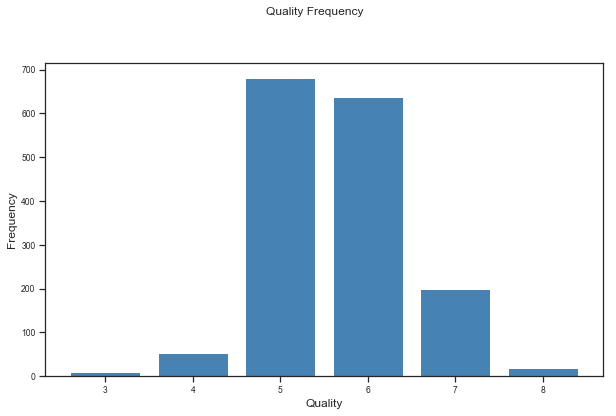

In [150]:
fig = plt.figure(figsize = (10, 6))
title = fig.suptitle("Quality Frequency", fontsize=12)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax = fig.add_subplot(1,1, 1)
ax.set_xlabel("Quality")
ax.set_ylabel("Frequency") 
w_q = wines_df['quality'].value_counts()
w_q = (list(w_q.index), list(w_q.values))
ax.tick_params(axis='both', which='major', labelsize=8.5)
bar = ax.bar(w_q[0], w_q[1], color='steelblue')

La major part dels vins que estan presents al dataset son d'una qualitat mitja. Això pot comportar que les dades disponibles no siguin suficients per tal de classificar els vins de baixa i alta qualitat.

Per tal de facilitar l'anàlisi crearem una característica derivada del camp __qualitat__.

Nou atribut/característica afegides al data set original:

- __quality_cat__: es tracte d'un atribut derivat de la característica __quality__. Creem 3 grups diferenciats de vins en funció de la seva qualitat. Els vins que tenen una qualitat igual o inferior a 5 s'etiquetaran com vins d'una __qualitat baixa__,  els vins amb una qualitat enregistrada de 6 s'etiquetaran com vins d'una __qualitat mitja__, i per últim, els vins amb una qualitat igual o superior a 7 els considerarem vins d'una __alta qualitat__.

In [151]:
wines_df['quality_cat'] = wines_df['quality'].apply(lambda value: 'low' 
                                                    if value <= 5 else 'medium' 
                                                    if value == 6 else 'high')
wines_df['quality_cat'] = pd.Categorical(wines_df['quality_cat'], 
                                         categories=['low', 'medium', 'high'])

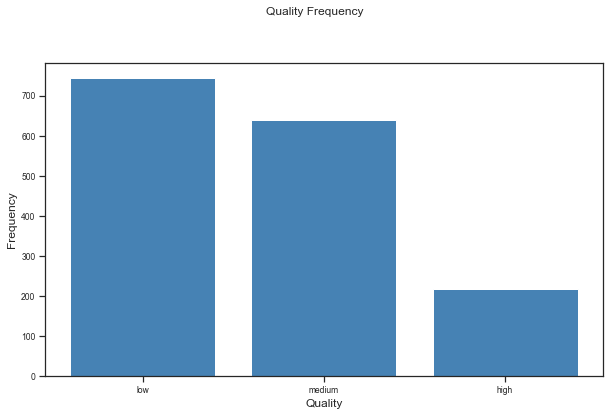

In [152]:
fig = plt.figure(figsize = (10, 6))
title = fig.suptitle("Quality Frequency", fontsize=12)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax = fig.add_subplot(1,1, 1)
ax.set_xlabel("Quality")
ax.set_ylabel("Frequency") 
w_q = wines_df['quality_cat'].value_counts()
w_q = (list(w_q.index), list(w_q.values))
ax.tick_params(axis='both', which='major', labelsize=8.5)
bar = ax.bar(w_q[0], w_q[1], color='steelblue')

Amb la discretització aconseguim equilibrar els casos de vins amb baixa i mitja qualitat, però encara continuem tenint un número molt baix de vins de alta qualitat.

Les seguents son les característiques numéricas que farem servir al análisis per identificar les que poden tenir una major incidencia a l'hora de classificar la qualitat dels vins.

In [153]:
input_features = ["fixed acidity",
                  "volatile acidity",
                  "citric acid",
                  "residual sugar",
                  "chlorides",
                  "free sulfur dioxide",
                  "total sulfur dioxide",
                  "density",
                  "pH",
                  "sulphates",
                  "alcohol"]

## 3. Data Cleaning

Procedirem a crear un dataset amb els següents camps que ens ajudaran a identificar la qualitat de les dades amb les que treballem:

- Tipus de dades
- Número de valors nuls (missings)
- Número de zeros
- Número de calors extrems
- Número de valors únics

In [298]:
def gen_quality_stats(df):
    # Calculem la mediana
    median = pd.DataFrame(df.median(),columns=['median'])
    
    # Obtenim els tipus de cada columns
    data_types = pd.DataFrame(df.dtypes, columns=['Types'])

    # Contem el número de valors nuls a cada columna
    missings = pd.DataFrame(df.isnull().sum(), columns=['Missings'])
    
    # Contem el número de zeros a cada columna
    zeros = pd.DataFrame((df == 0).sum(axis=0), columns=['Zeros'])
    
    # Contem la quantitat de valors unics a cada columna
    uniques = pd.DataFrame(columns=['Uniques'])
    for v in list(df.columns.values):
        uniques.loc[v] = [df[v].nunique()]
        
    # Contem el número de valors extrems per columna.
    # Tot el que estigui dintre dels rangs (-Inf, Q2 -1.5) i (Q3 + 1.5, +Inf) serán
    # valor extrems
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1

    outliers = pd.DataFrame(columns=['Outliers'])
    for v in list(df.columns.values):         
        outliers.loc[v] = [((df[v] < (Q1[v] - 1.5 * IQR[v])) | 
                                  (df[v] > (Q3[v] + 1.5 * IQR[v]))).sum()] \
        if df[v].dtype.name != "category" and uniques.loc[v].values[0] > 2 else 0
            
    return data_types. \
        join(uniques). \
        join(missings). \
        join(zeros). \
        join(outliers)        

Calculem les dades de qualitat

In [299]:
gen_quality_stats(round(wines_df, 2))

,Types,Uniques,Missings,Zeros,Outliers
fixed acidity,float64,96,0,0,49
volatile acidity,float64,94,0,0,19
citric acid,float64,80,0,132,1
residual sugar,float64,91,0,0,155
chlorides,float64,37,0,0,151
free sulfur dioxide,float64,60,0,0,30
total sulfur dioxide,float64,144,0,0,55
density,float64,2,0,0,0
pH,float64,89,0,0,35
sulphates,float64,96,0,0,59


Observacions:

- Els camps __residual sugar__ (155) i __chlorides__ (151) son tres camps que presenten un número molt elevat de valors atípics. Els valors atípics poden afectar negativament al càlcul de les mitges i les seves variàncies. 
- El camp __citric_acid__ es l'únic camp que presenta zeros en una quantitat elevada (132). Podrien ser errors de captura de les dades o d'entrada de dades. Encara que també podrien ser valor vàlids. En cas de no ser valors correctes hauríem de: obviar el camp, eliminar totes les entrades amb zeros, imputar els valors en base als altres casos (fent servir, per exemple, l'algoritme *K-Nearest Neighbors*)
- Les dades __no presenten cap valor buit__. Per tal de resoldre valors buits hauríem d'aplicar les mateixes regles que en el punt anterior.

### 3.1 Imputar valors pel camp Citric Acid

Anem a imputar els valors dels casos que contenen zero com a valor pel camp __citric_acid__, i farem servir l'algoritme K-NN amb K = 5.

[__Suposició!!__] L’àcid cítric es un àcid fixe que prové de la pròpia polpa del raïm. Això vol dir que es estrany que aquest no estigui present i que s'hagi evaporat absolutament durant el procés de fermentació. Per aquest motiu intentarem regenerar els valors no informats del àcid cítric (aquells que contenen 0) a partir de les altres variables relacionades amb el nivell d'acid: __fixed acid__, __volatile acidity__ i __citric acid__.

In [300]:
from fancyimpute import KNN

wine_acids_df = wines_df[["fixed acidity", "volatile acidity", "citric acid"]].copy()
wine_acids_df = wine_acids_df.replace(0, np.nan)

wine_acids_df_filled = pd.DataFrame(KNN(5, verbose=False).fit_transform(wine_acids_df))

wines_df_filled = wines_df.copy()
wines_df_filled['citric acid'] = wine_acids_df_filled[2]

gen_quality_stats(round(wines_df_filled, 2))

,Types,Uniques,Missings,Zeros,Outliers
fixed acidity,float64,96,0,0,49
volatile acidity,float64,94,0,0,19
citric acid,float64,79,0,0,1
residual sugar,float64,91,0,0,155
chlorides,float64,37,0,0,151
free sulfur dioxide,float64,60,0,0,30
total sulfur dioxide,float64,144,0,0,55
density,float64,2,0,0,0
pH,float64,89,0,0,35
sulphates,float64,96,0,0,59


Observacions:

- Una vegada aplicat l'algoritme K-NN sobre els valors nulls, obtenim un nou dataset sense zeros al camp __citric acid__

### 3.2 Exportar les dades

Exportem a un fitxer extern nomenat __winequality-red-filled.csv__ les dades preprocessades que es faran servir durant l'anàlisis.

In [316]:
wines_df_filled.to_csv("winequality-red-filled.csv")

## 4. Anàlisi Descriptiu

Les estadístiques descriptives proporcionen resums senzills de les dades.
- La mitja (aritmètica) calcula el valor típic del nostre conjunt de dades. No és robust, sent impactat pels valors extrems.
- La mitjana és el valor mitjà exacte del nostre conjunt de dades. És robust, no sent impactat pels valors extrems.
- La moda és el valor que més apareix.
- El rang és la diferència entre el valor més gran i el més petit del nostre conjunt de dades.
- La variància i la desviació estàndard són la distància mitjana de la mitja.

In [301]:
# Calculem la mediana
median = pd.DataFrame(wines_df_filled.median(),columns=['median'])
# Calculem la variancia
var = pd.DataFrame(wines_df_filled.var(),columns=['var'])
# Calculem la moda
mode = wines_df_filled.mode().transpose()
mode.columns = ["mode"]
wines_df_filled.describe().transpose().join(median).join(var).join(mode)

,count,mean,std,min,25%,50%,75%,max,median,var,mode
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000,7.90000,3.031416,7.2
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000,0.52000,0.032062,0.6
citric acid,1599.0,0.281119,0.184689,0.01000,0.1200,0.26000,0.420000,1.00000,0.26000,0.034110,0.49
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000,2.20000,1.987897,2
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100,0.07900,0.002215,0.08
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000,14.00000,109.414884,6
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000,38.00000,1082.102373,28
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369,0.99675,0.000004,0.9972
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000,3.31000,0.023835,3.3
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000,0.62000,0.028733,0.6


## 5. Anàlisi Univariant

Normalitzem els resultats per tal de poder visualitzar-los amb la mateixa escala.

In [157]:
wines_df_filled_norm = wines_df_filled[input_features].div(
    wines_df_filled[input_features].sum(axis=1), axis=0)

Generem els boxplots amb les dades normalitzades.

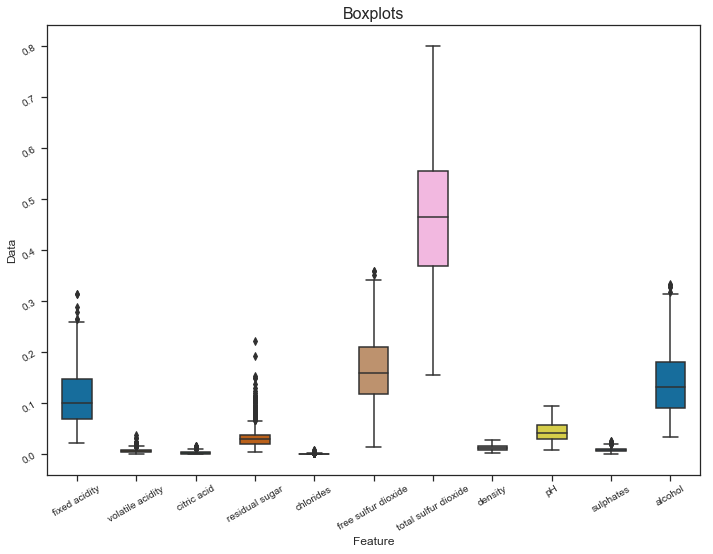

In [302]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
bplot = sns.boxplot(ax=ax, 
                    data=wines_df_filled_norm[input_features], 
                    width=0.5, 
                    palette="colorblind")
bplot.axes.set_title("Boxplots", fontsize=16)
bplot.set_xlabel("Feature", fontsize=12)
bplot.set_ylabel("Data", fontsize=12)
bplot.tick_params(labelsize=10, rotation=30)

Observacions:

- Els camps __residual sugar__ i __chlorides__ son els camps que presenten més valors extrems. Haurem de fixar-nos en aquests casos, igual pertanyen a una població de vins diferent, sigui per la regió a la que pertanyi el vi, pel tipus de raïm, etc.


Generem les visualitzacions de *histogrames*, *densitat* i *boxplots* dels atributs d'entrada. Calculem també els índex de *skewness* i *kurtosis*:

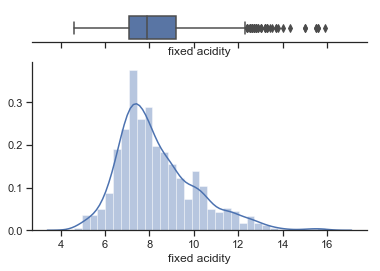

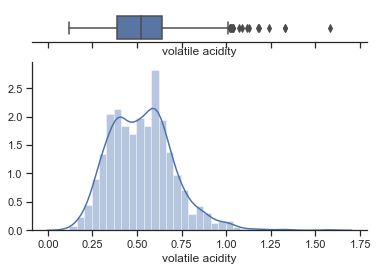

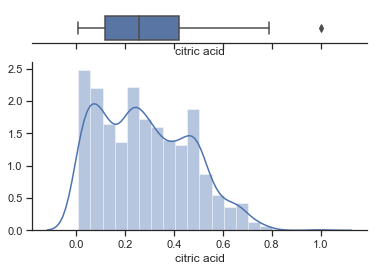

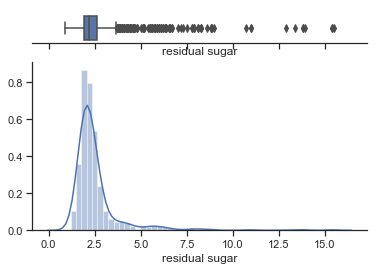

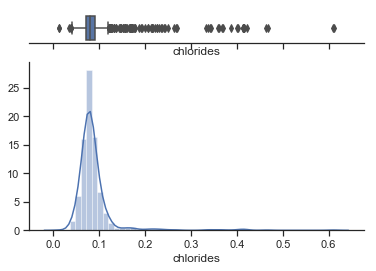

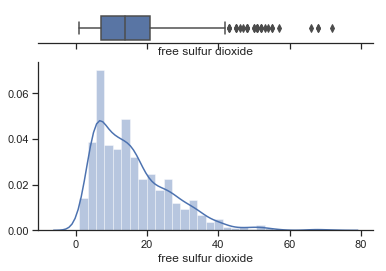

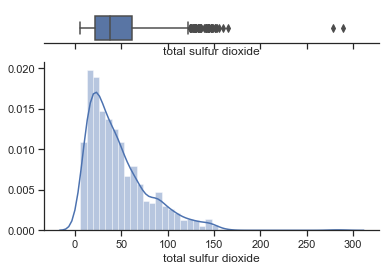

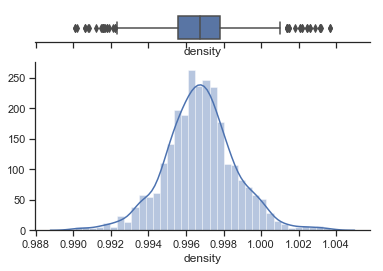

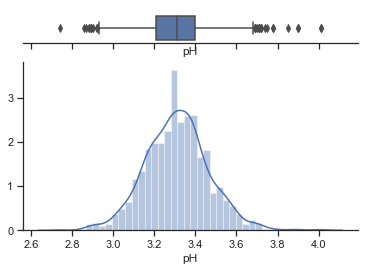

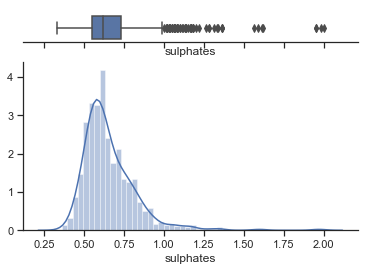

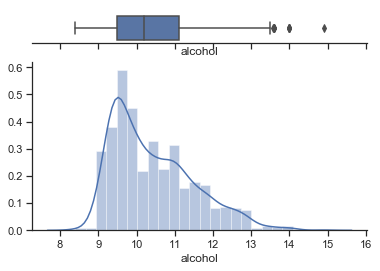

In [306]:
sns.set(style="ticks")

for index, feature in enumerate(input_features):
    f, (ax_box, ax_hist) = plt.subplots(
        2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

    bplot = sns.boxplot(wines_df_filled[feature], ax=ax_box)
    dplot = sns.distplot(wines_df_filled[feature], ax=ax_hist)
        
    ax_box.set(yticks=[])
    sns.despine(ax=ax_hist)
    sns.despine(ax=ax_box, left=True)

In [160]:
wines_skewness = pd.DataFrame(columns=['Skewness'])
for v in list(wines_df_filled.columns.values):
    wines_skewness.loc[v] = [wines_df_filled[v].skew()] if wines_df_filled[v].dtype.name != "category" else "-"

wines_kurtosis = pd.DataFrame(columns=['Kurtosis'])
for v in list(wines_df_filled.columns.values):
    wines_kurtosis.loc[v] = [wines_df_filled[v].kurtosis()] if wines_df_filled[v].dtype.name != "category" else "-"
    
wines_skewness.join(wines_kurtosis)

,Skewness,Kurtosis
fixed acidity,0.982751,1.13214
volatile acidity,0.671593,1.22554
citric acid,0.394456,-0.664411
residual sugar,4.54066,28.6176
chlorides,5.68035,41.7158
free sulfur dioxide,1.25057,2.02356
total sulfur dioxide,1.51553,3.80982
density,0.0712877,0.934079
pH,0.193683,0.806943
sulphates,2.42867,11.7203



El __skewness__ mesura la proporció entre les cues (tails) de dades, es una mesura de simetria. Un skew positiu +X vol dir que la cua de la dreta de la distribució acumula X% mes de valors que la de la dreta. I -X al contrari.

__Kurtosis__ mesura la quantitat de probabilitat que s'acumula a les cues (tails). El valor de kurtosis de una distribució normal es 3, llavors si el nostre kurtosis es superior voldrà dir que les nostres cues son molt més grans, acumulen molt més valors (probabilitat), i un valor menor voldrà dir que existeix una major concentració de les dades al voltant de la part central, sent les cues menors (menor probabilitat).

Observacions per camp:

- __fixed_acidity__: la distribució mostra un skewness positiu (0.98), asimètrica. La mitjana està al voltant de 7.9, i la mitja es troba al 8.32. La mitja està moguda cap a la dreta pels valors atípics que tiren una mica d'ella. La gran quantitat de vins es concentren al voltant de la mitja en base a la seva acidesa fixa.

- __volatile acidity__: presenta una distribució més del tipus bimodal amb dos pics al voltant del 0.38 i 0.63.

- __citric_acid__: mostra una distribució sense una forma molt clara, els valors semblen no seguir cap distribució. També presenta pocs valors molt a l'extrem. Pot-ser aquest camp no ens ajudi massa a l'hora de identificar la qualitat d'un vi. Es un candidat a ficar fora de la selecció final. 

- __residual sugar__: la distribució mostra un skewness positiu bastant important (4.54), i un índex de kurtosis molt gran (28.62) ja que la cua de la dreta conté molts més valors que la cua de l'esquerra, presentant una cua bastant llarga, producte també de l'existència de molts valors grans extrems. Molts dels valors es concentren al pic de 2.2 (mitjana).

- __chlorides__: al igual que en el cas del __residual sugar__, la distribució presenta una gran distorsió positiva de (5.86) i un índex de kurtosis molt més elevat (45) provocat per una gran quantitat de valors extrems a la part dreta de la distribució. La major part dels vins es concentren al pic de 0.08.

- __free sulfur dioxide__: mostra tb una distribució normal amb una forta distorsió positiva (1.26). Sembla que existeix una concentració important de vins al pic al voltant de 7, i que conforme els valors es fan mes grans la distribució va decreixent lentament, no es una caiguda brusca. La qual del costat de valors grans es una cua llarga. Això i l'existència d'alguns valors extrems fan que la mitja de quasi 16 es trobi molt més cap a la dreta de la mitjana al 14.

- __total sulfur dioxide__: distribució molt similar a la presentada al camp __free sulfur dioxide__. Presenta una distorció positiva important amb una cua al cantó dels valors grans bastant llarga.

- __density__: mostra un comportament de distribució normal, amb un índex de skew de quasi 0.

- __pH__: també presenta un comportament de distribució normal.

- __sulphates__: presenta una distribució normal amb una distorsió positiva (2.43) i una llarga cua cap als valors més grans, generada principalment per l'existència de pocs valors bastant extrems. El tipus de distorsió es bastant similar a les presentades pels camps __free sulfur dioxide__ (1.25) i __total sulfur dioxide__ (1.52).

- __alcohol__: presenta una distribució normal amb una lleugera distorsió positiva (0.87) en la línia dels camps __fixed acidity__ o __volatile acidity__. 

Resum:

- En relació a les distribucions trobem que els camps __density__, __pH__, i __volatile acidity__ mostren un comportament de distribució normal estàndard. 

- Els camps __alcohol__, __fixed acidity__, __free sulfur dioxide__, __sulphates__, __total sulfur dioxide__ mostren unes distribucions normals amb una tendència a la distorsió positiva, inclinades cap al cantó esquerra (valor més petits).

- El camp __citric acid__ es el camp que presenta una distribució molt anormal. De tots els camps sembla el camp menys informatiu.

- Els camps __chlorides__ i __residuals__ mostren una concentració molt gran al voltant de la mitjana amb una quantitat gran de valors extrems que poden dificultar el anàlisis.

## 6. Anàlisis Bivariant

Farem un anàlisis de correlació per tal de veure els camps que estan fortament correlacionat. 

### 6.1 Calculant la correlació entre camps

Els camps correlacionats, en general, no ajuden a millorar la qualitat dels models (això dependrà molt del problema així com el número de variables i el seu grau de correlació). Per aquest motiu pot ser bastant útil eliminar camps correlacionats abans d'entrenar qualsevol model de classificació o regressió (quality_cat o quality respectivament).

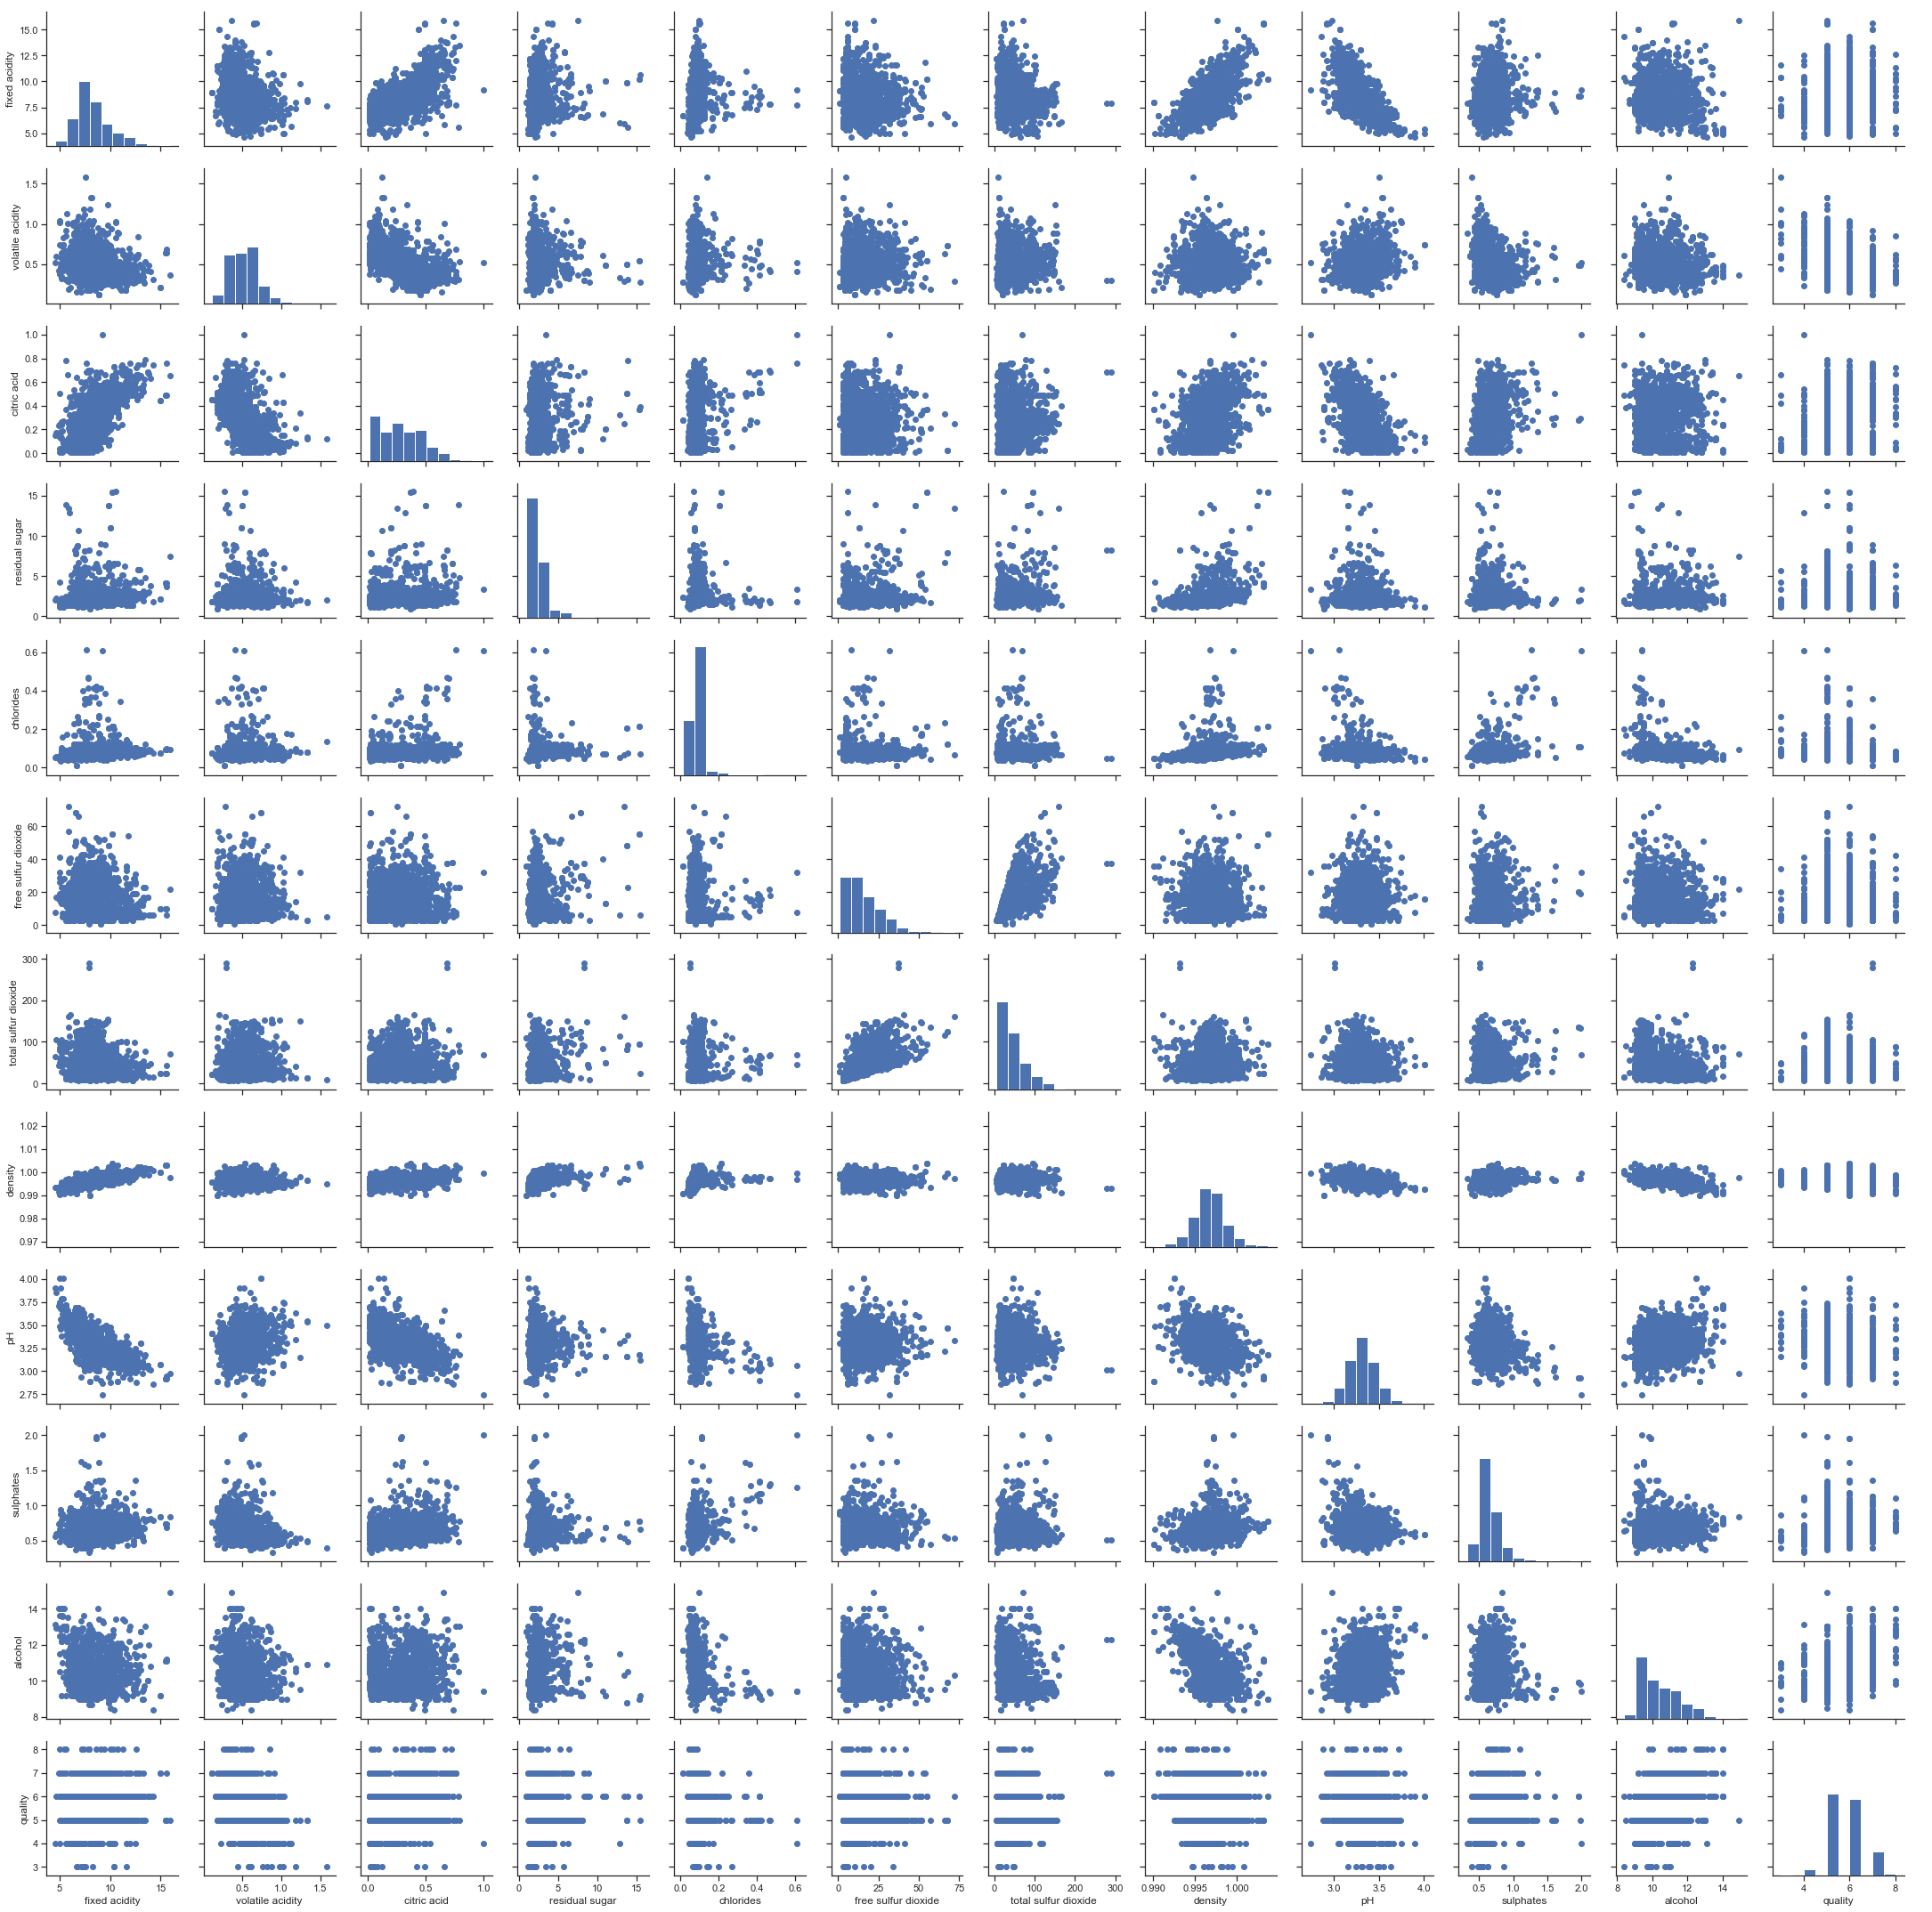

In [308]:
g = sns.PairGrid(wines_df_filled)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend();

Observacions:

- Gràficament amb els scatter es fa una mica complicat veure les correlacions existents. 

Calcularem la matriu de correlacions i mostrarem un heatmap per visualitzar-les millor.

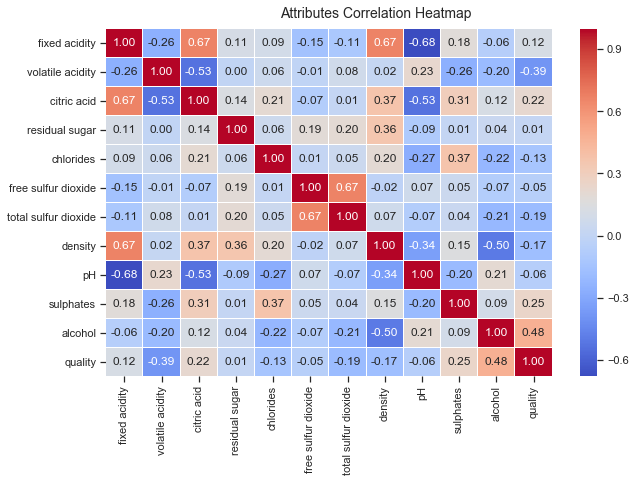

In [315]:
# Correlation Matrix Heatmap
f, ax = plt.subplots(figsize=(10, 6))
wines_corr = wines_df_filled.corr()
hm = sns.heatmap(round(wines_corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Attributes Correlation Heatmap', fontsize=14)

Observacions:

- El camp __fixed acidity__ sembla que està positivament correlacionat amb els camps __citric acid__ i __density__, a més __fixed acidity__ major la __densitat__ i la quantitat de __citric_acid__. Lo que es normal, ja que el àcid cítric es un dels tipus de àcids fixes que estan presents als raïms (tartàric, màlic, cítric, i succínic son els més importants).
- Al mateix temps, sembla que el camp __fixed acidity__ i __citric acid__ està negativament correlacionat amb el __pH__. Una cosa completament normal ja contra més acida es una solució més pròxim de 0 es troba el pH.
- Sembla que existeix una correlació negativa entre els camps __volatile acidity__ i el __citric acid__. Els àcids volàtils son creats durant el procés de fermentació. A més gran proporció d’àcids volàtils més petita es la proporció d'àcid cítric. 
- Com es també lògic, existeix una forta correlació positiva entre els camps __free sulfur dioxide__ i __total sulfur dioxide__, ja que un està inclòs a l'altre.
- Existeix una molt forta correlació positiva molt forta entre la __density__ i el grau de __alcohol__ dels vins. A més alcohol la densitat del vi augmenta.
- Els camps que semblen estar més directament correlacionats amb la qualitat del vi son:
    - correlació positiva: vins més alcohòlics (__alcohol__) presenten una millor qualitat. 
    - correlació negativa: vins que presenten una quantitat d’àcids volàtils obtenen una pitjor qualitat. Aixó es degut a que quantitats apreciables d’àcid volàtil son un signe de deterioració del vi.


### 6.2 Visualitzar relació dels camps amb la qualitat dels vins

Ara generarem uns boxplots per veure gràficament com varia la qualitat dels vins en funció de cada característica. Compararem la mitjana a cada nivell de qualitat, si existeix una variació considerable, llavors podem deduir que la característica té un impacte rellevant en la qualitat dels vins.

Comparem les mitjanes perquè és una mesura de centre robusta, que no s’altera amb l’existència de valors extrems.

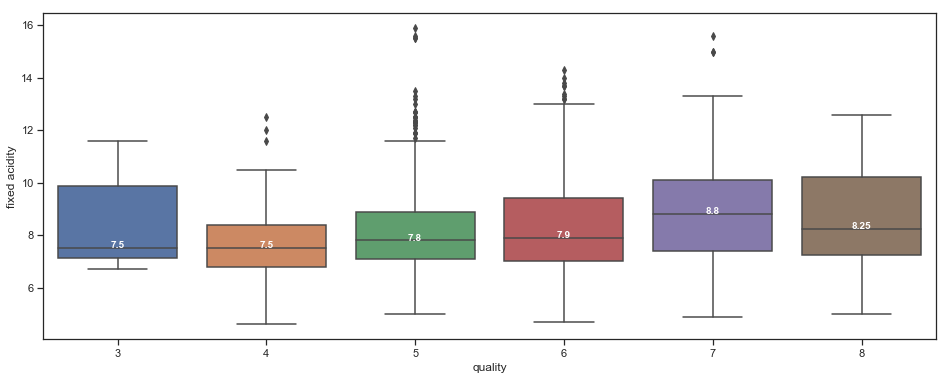

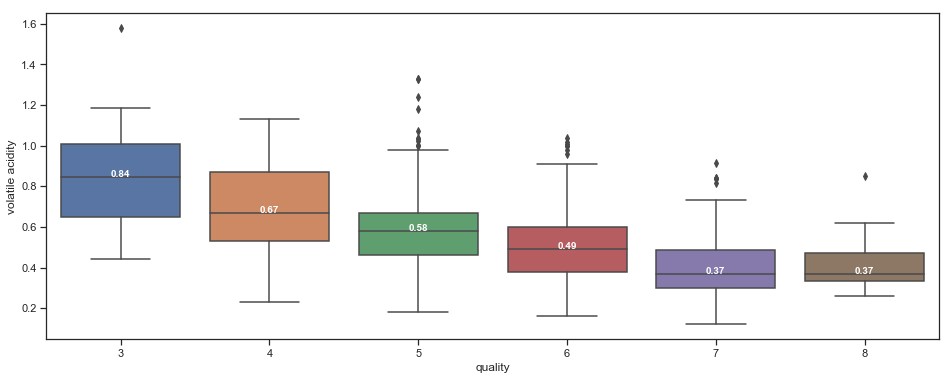

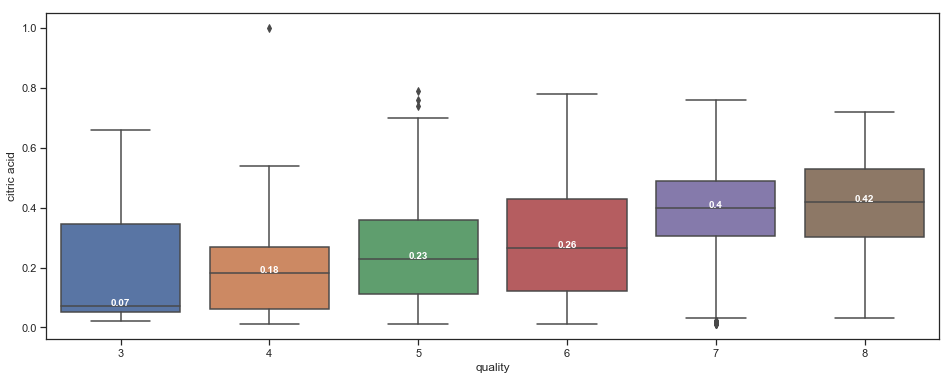

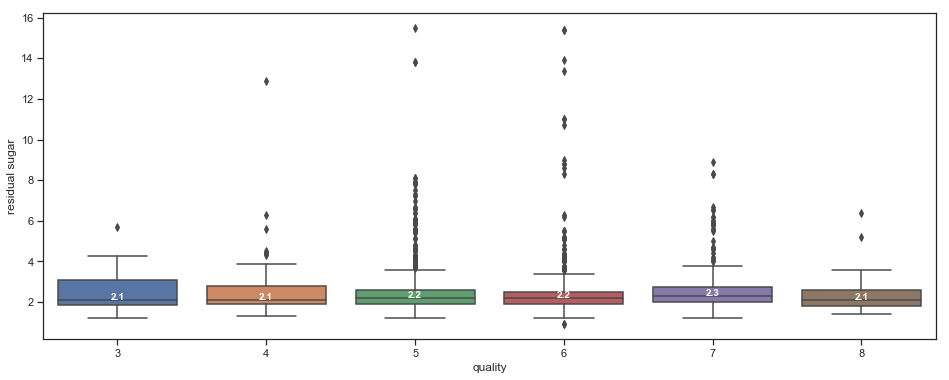

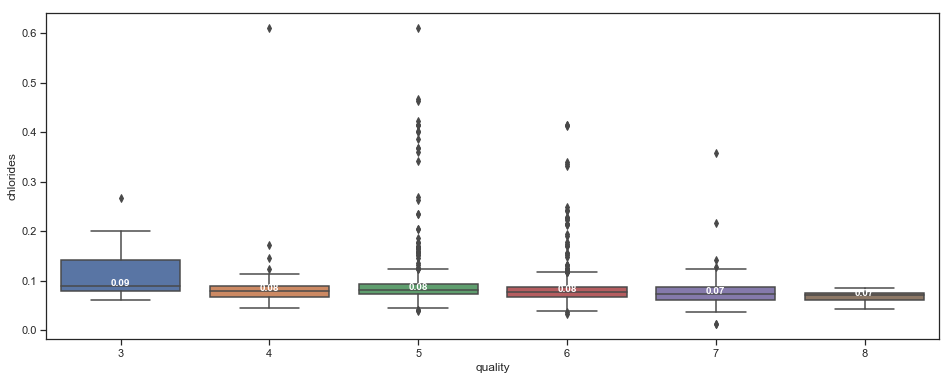

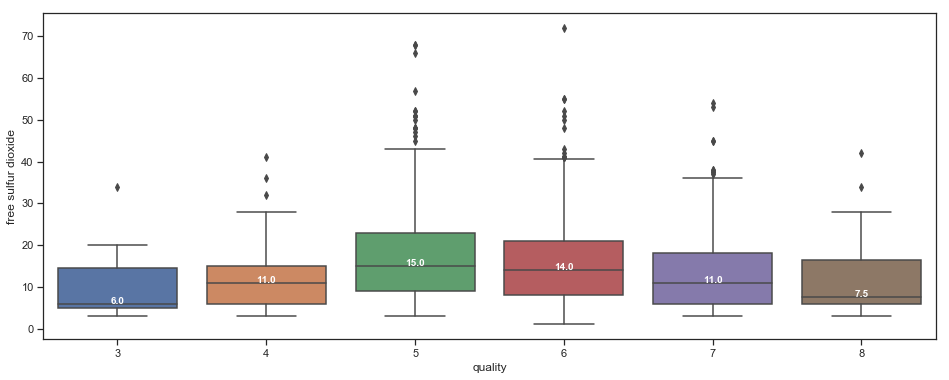

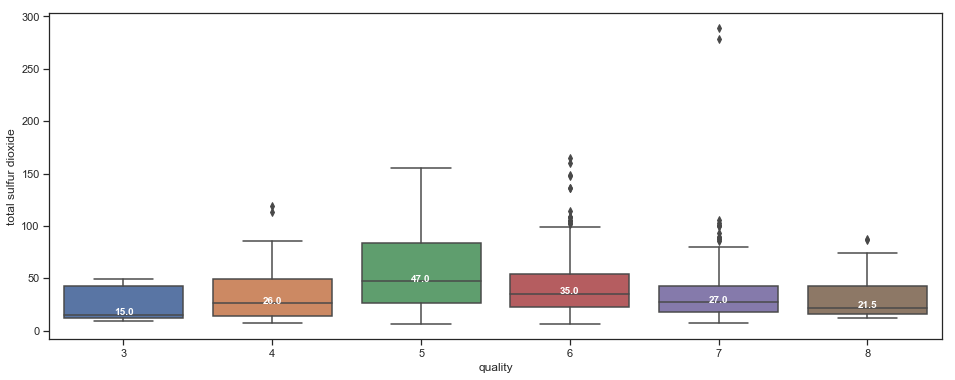

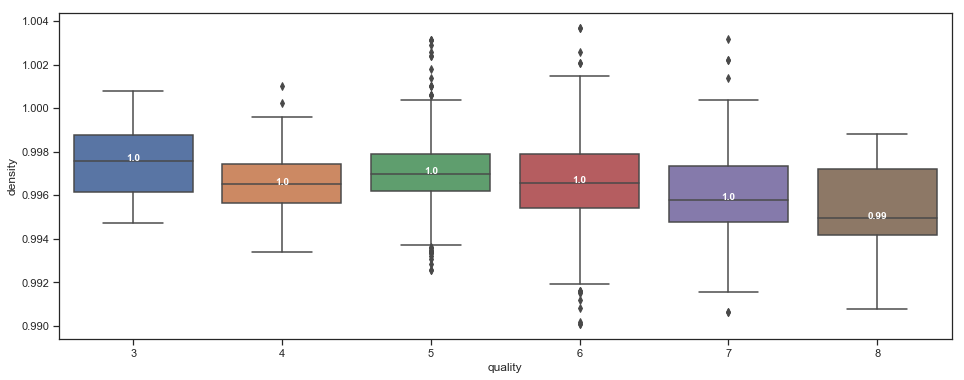

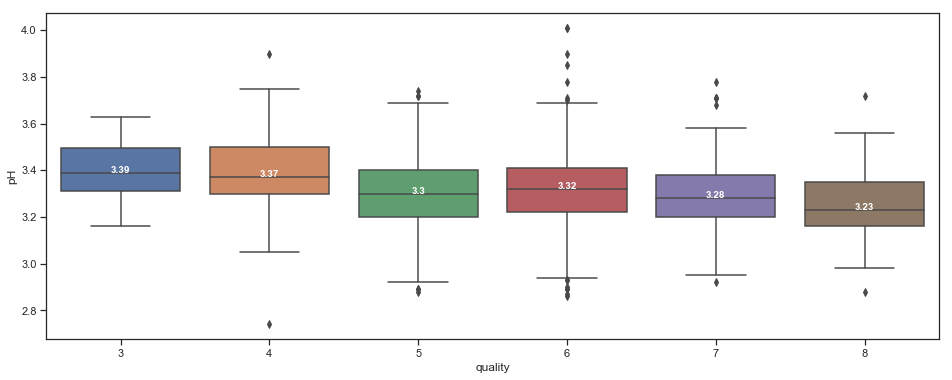

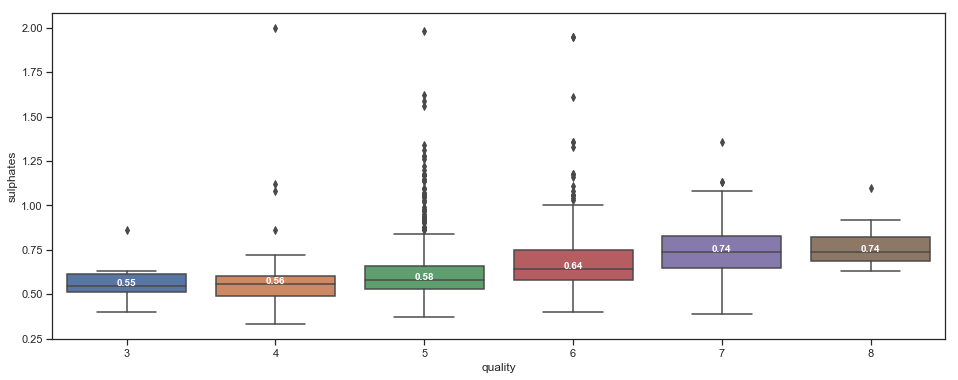

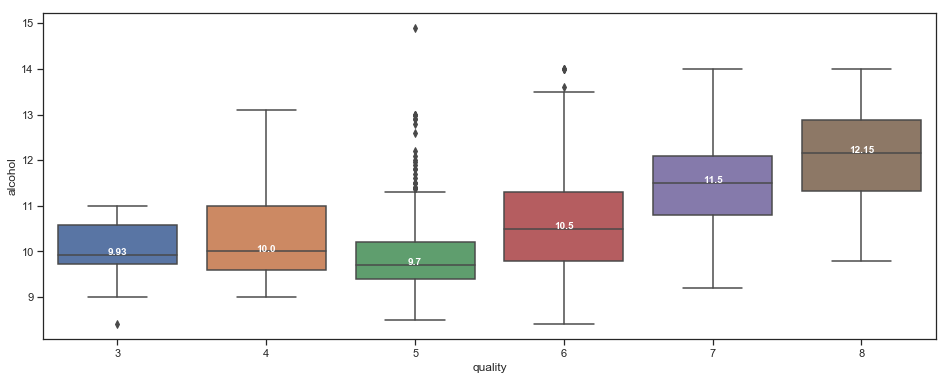

In [163]:
for ax, feature in zip(axes, input_features):
    plt.figure(figsize=(16, 6))
    ax = sns.boxplot(x="quality", y=feature, data=wines_df_filled)

    medians = wines_df_filled.groupby(['quality'])[feature].median().values
    median_labels = [str(np.round(s, 2)) for s in medians]

    pos = range(len(medians))
    for tick, label in zip(pos,ax.get_xticklabels()):
        ax.text(pos[tick], medians[tick], median_labels[tick], 
                horizontalalignment='center', size='small', color='w', weight='semibold')
    plt.show()

Observacions:

- __fixed acidity__: no sembla que aquest camp tingui incidència en la qualitat dels vins. La mitjana no presenta valors diferents (substancialment) a cada nivell de qualitat.
- __volatile acidity__: aquest camp si que incideix de manera molt directe en la qualitat dels vins, a valors menors major es la qualitat del vi. Això ja va quedar patent en l'apartat anterior, quan vàrem veure que existia una correlació negativa entre els camps, ja que uns nivells apreciables d'aquests àcids impliquen una deterioració del vi.
- __citric acid__: sembla que aquest àcid té un impacte en la qualitat, a volums més elevats d'aquest àcid millor es la qualitat. Per lo tant, raïms amb una concentració més elevada d'aquest àcid implicarà una millor qualitat del vi.
- __residual sugar__: no sembla que tingui incidència directa, les mitjanes no varien.
- __chlorides__: tampoc sembla que tingui cap incidència directa en la qualitat dels vins, la mitjana també sembla similar.
- __free sulfur dioxide__: el que observem es que tant les pitjors qualitats com les millors tenen un mateix (quasi) nivell de SO2 lliure, per lo tant no ajuda a l'hora d'identificar la qualitat dels vins.
- __total sulfur dioxide__: es lo mateix que amb el nivell lliure de SO2.
- __density__: les mitjanes son pràcticament iguals, no té cap incidència.
- __pH__: les mitjanes son pràcticament iguals, no té cap incidència.
- __sulphates__: sembla que existeix una correlació positiva entre els sulfats i la qualitat del vi. A més sulfats millor es la qualitat del vi.
- __alcohol__: també sembla que pot tenir un impacte en la qualitat, ja que a valors mes grans d'alcohol millor es la qualitat dels vins.

Resum:
- Visualment, els camps Alcohol, Sulphates, Citric Acid, i Volatile Acidity mostren una variació significativa de les mitjanes. A priori sembla que podrien ser bons classificadors dels vins per determinar la seva qualitat.
- Els gràfics dels camps Free sulfur dioxide i Total sulfur dioxide no mostren variacions aparents en els vins de baixa i alta qualitat. 
- Els demés camps no mostren unes variacions significatives (visualment).

### 6.3 Calcular l'índex de correlació amb la qualitat dels vins (comprovació de les dades anteriors)

Ara calcularem a l'índex de correlació existent entre cada camp numèric i la qualitat dels vins, per veure si efectivament es compleix el que hem vist als gràfics del apartat anterior.

In [164]:
pd.DataFrame(wines_corr["quality"])

,quality
fixed acidity,0.124052
volatile acidity,-0.390558
citric acid,0.220846
residual sugar,0.013732
chlorides,-0.128907
free sulfur dioxide,-0.050656
total sulfur dioxide,-0.185100
density,-0.174919
pH,-0.057731
sulphates,0.251397


Efectivament, es confirmen les dades de l'apartat anterior. Els camps __Alcohol__, __Sulphates__, __Citric Acid__, i __Volatile Acid__, son els camps que mostren un major índex de correlació amb la qualitat dels vins.

### 6.4 Calcular l'importancia de cada camp en relació a la qualitat

Ja hem identificat que 4 camps tenen una incidència directe en la qualitat dels vins. 

Ara anem a calcular un model de regressió sobre cada una d'aquestes variables per veure quant % de variància expliquen del model final, o sigui, quant importants son a l'hora de preveure la qualitat dels vins.

Ordre de càlcul:
- Citric acid
- Alcohol
- Volatile acidity
- Sulphates

In [311]:
import statsmodels.api as sm

wines_quality = wines_df_filled["quality"]
X_citric_acid = sm.add_constant(wines_df_filled["citric acid"])

citric_acid_model = sm.OLS(wines_quality, X_citric_acid).fit()
print("\t Importance of the Citric Acid (R-squared)")
citric_acid_model.summary()

	 Importance of the Citric Acid (R-squared)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     81.88
Date:                Sun, 06 Jan 2019   Prob (F-statistic):           4.08e-19
Time:                        22:21:12   Log-Likelihood:                -1886.7
No. Observations:                1599   AIC:                             3777.
Df Residuals:                    1597   BIC:                             3788.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           5.3646      0.036    149.466      0.000       5.294       5.435
citric acid     0.9657      0.107      9.049      0.000       0.756       1.175
==============================================================================
Omnibus:                       11.563   Durbin-Watson:                   1.738
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               12.476
Skew:                           0.159   Prob(JB):                      0.00195
Kurtosis:                       3.294   Cond. No.                         5.86
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [312]:
X_alcohol = sm.add_constant(wines_df_filled["alcohol"])

print("\t Importance of the Alcohol (R-squared)")
alcohol_model = sm.OLS(wines_quality, X_alcohol).fit()
alcohol_model.summary()

	 Importance of the Alcohol (R-squared)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.227
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     468.3
Date:                Sun, 06 Jan 2019   Prob (F-statistic):           2.83e-91
Time:                        22:21:18   Log-Likelihood:                -1721.1
No. Observations:                1599   AIC:                             3446.
Df Residuals:                    1597   BIC:                             3457.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8750      0.175     10.732      0.000       1.532       2.218
alcohol        0.3608      0.017     21.639      0.000       0.328       0.394
==============================================================================
Omnibus:                       38.501   Durbin-Watson:                   1.748
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               71.758
Skew:                          -0.154   Prob(JB):                     2.62e-16
Kurtosis:                       3.991   Cond. No.                         104.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [313]:
X_volatile_acidity = sm.add_constant(wines_df_filled["volatile acidity"])

print("\t Importance of the Volatile Acidity (R-squared)")
volatile_acidity_model = sm.OLS(wines_quality, X_volatile_acidity).fit()
volatile_acidity_model.summary()

	 Importance of the Volatile Acidity (R-squared)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.153
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     287.4
Date:                Sun, 06 Jan 2019   Prob (F-statistic):           2.05e-59
Time:                        22:21:26   Log-Likelihood:                -1794.3
No. Observations:                1599   AIC:                             3593.
Df Residuals:                    1597   BIC:                             3603.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                6.5657      0.058    113.388      0.000       6.452       6.679
volatile acidity    -1.7614      0.104    -16.954      0.000      -1.965      -1.558
==============================================================================
Omnibus:                       20.577   Durbin-Watson:                   1.736
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.905
Skew:                           0.242   Prob(JB):                     1.75e-05
Kurtosis:                       3.306   Cond. No.                         7.18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [314]:
X_sulphates = sm.add_constant(wines_df_filled["sulphates"])

print("\t Importance of the Sulphates (R-squared)")
sulphates_model = sm.OLS(wines_quality, X_sulphates).fit()
sulphates_model.summary()

	 Importance of the Sulphates (R-squared)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     107.7
Date:                Sun, 06 Jan 2019   Prob (F-statistic):           1.80e-24
Time:                        22:21:29   Log-Likelihood:                -1874.4
No. Observations:                1599   AIC:                             3753.
Df Residuals:                    1597   BIC:                             3764.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.8477      0.078     61.818      0.000       4.694       5.002
sulphates      1.1977      0.115     10.380      0.000       0.971       1.424
==============================================================================
Omnibus:                       12.685   Durbin-Watson:                   1.712
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               17.098
Skew:                           0.083   Prob(JB):                     0.000194
Kurtosis:                       3.479   Cond. No.                         8.51
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Relació de camps fortament correlacionats ordenats pel nivell d'importància (més importants primer):

- __Alcohol__ amb un R-squared del 22%. Aquest camp explica el 22% de la variabilitat del dataset.
- __Volatile Acidity__ amb un R-squared del 15%.
- __Sulphates__ amb un R-squared del 6%.
- __Citric Acid__ amb un R-squared del 5%.

### 6.5 Resum

Els camps amb un impacte directe a la qualitat dels vins son:

- Positivament correlacionats: <span style="color:green">citric acid</span>, <span style="color:green">alcohol</span>

- Negativament correlacionats: <span style="color:red">volatile acidity</span>, <span style="color:red">sulphates</span>

De entre tots els camps anteriors, l'__alcohol__ es el que té un major impacte en la qualitat dels vins, seguit del __volatile acidity__.

## 7 Anàlisi de la variància

Hem vist que l'__alcohol__ es el camp més fortament correlacionat amb la qualitat dels vins. 

El que farem ara es veure si veritablement las mitges i desviacions de les mostres d'alcohol per als 3 tipus de qualitats (baixa, bona, molt bona) son les mateixes (no hi ha diferencia entre qualitats) o realment pertanyen a poblacions diferents (hi ha diferencia entre qualitats).

La hipòtesis nul·la es que el grau alcohol no identifica de manera unívoca la qualitat dels vins ja que les seves mitjas i variacions son iguals:

- Ho: μ(low) = μ(medium) = μ(high)

Pel contrari, la hipòtesis alternativa serà que el grau d'alcohol si que identifica de manera clara la qualitat del vi, i per lo tant les seves mitges son diferents:

- H1: μ(low) ≠ μ(medium) ≠ μ(high)

Per fer aquest estudi farem el test ANOVA fent servir **statsmodel**, que ens ajudarà a obtenir més d'informació i introduïm el model com una fórmula de regressió.

In [196]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

mod = ols('alcohol ~ quality_cat', data=wines_df_filled).fit()
          
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                alcohol   R-squared:                       0.259
Model:                            OLS   Adj. R-squared:                  0.259
Method:                 Least Squares   F-statistic:                     279.6
Date:                Sun, 06 Jan 2019   Prob (F-statistic):          8.01e-105
Time:                        20:13:54   Log-Likelihood:                -2129.9
No. Observations:                1599   AIC:                             4266.
Df Residuals:                    1596   BIC:                             4282.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 9.9265      0.034    295.061      0.000       9.860       9.992
quality_cat[T.medium]     0.7030      0.050     14.199      0.000       0.606       0.800
quality_cat[T.high]       1.5916      0.071     22.481      0.000       1.453       1.730
==============================================================================
Omnibus:                      162.565   Durbin-Watson:                   1.528
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              230.769
Skew:                           0.777   Prob(JB):                     7.75e-51
Kurtosis:                       4.024   Cond. No.                         3.69
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

El grup de qualitat *low* està capturat al *Intercept*.

En general, el model és significatiu, F-statistic (2, 1596) = 279.6, p = 0,0000. Això ens diu que hi ha una diferència significativa en les mitges dels grups. Els coeficients (coef a la taula) són la diferència de la mitja entre el grup de control (low) i els grups respectius (medium i high).

La intercepció és la mitja del grup de baixa qualitat (low), el coeficient del grup high = 1.5916, i el coeficient de qualitat mitja = 0.7030. Si observem els valors p ara (P>|t| a la taula), podem observar que les diferències entre els grups son significatives, p = 0.0000.

No hi ha cap comparació entre el grup de qualitat mitja i el grup de qualitat alta. 

Procedent del marc ANOVA, la informació que realment ens interessa d'aquesta taula és la F-statistic i el corresponent p-value. I ens indica si hem explicat una quantitat significativa de la variància global. Per fer proves entre grups, hem de fer algunes proves post-hoc on podrem comparar tots els grups un contra l'altre. 

Amb aquest mètode encara ens falta informació útil, necessitarem una taula ANOVA.

In [198]:
aov_table = sm.stats.anova_lm(mod, typ=2)

aov_table

,sum_sq,df,F,PR(>F)
quality_cat,470.843637,2.0,279.579864,8.009998e-105
Residual,1343.920900,1596.0,NaN,NaN


Anem a inspeccionar la taula ANOVA. 

La fila de __qualitat_cat__ és l'efecte entre qualitats que és l'efecte experimental general.

La suma de quadrats del model (SSM té un valor de 470.84 a la taula) és la quantitat de variància que explica el model. El model actual explica una quantitat significativa de variància, F (2, 1596) = 279.58, p < 0.0000. 

La fila __Residual__ és la variació no sistemàtica de les dades (SSR, també anomenada variància inexplicable, el valor 1343.92 a la taula). En aquest cas, la variació no sistemàtica representa les diferències individuals naturals en el alcohol i les diferents qualitats del vi.

## 8. Regressió

Hem identificat els camps que estan correlacionats amb la qualitat dels vins.

Hem confirmat que el alcohol es la variable més correlacionada amb la qualitat, i on les variàncies de cada grup de qualitat (low, medium, high) representen poblacions independents.

Ara el que farem es crear un model de regressió amb tots aquests camps.

	Coefficients:  [ 0.31071915 -1.19989624  0.63856057 -0.08435256]
	Mean squared error: 0.40
	Variance score: 0.39


Text(0.0, 1.0, 'Errors obtinguts vs Qualitat esperada')

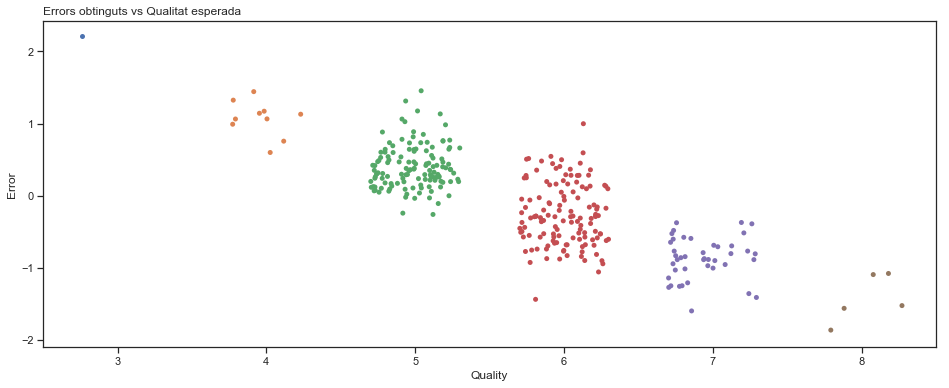

In [228]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

wines_y = wines_df_filled["quality"]
wines_X = wines_df_filled[["alcohol", "volatile acidity", "sulphates", "citric acid"]]

wines_X_train, wines_X_test, wines_y_train, wines_y_test = train_test_split(
    wines_X, wines_y, test_size=0.20, random_state=42)

# Creem l'objecte de regressio lineal
regr = linear_model.LinearRegression()

# Entrenem el model fent servir el training sets
regr.fit(wines_X_train, wines_y_train)

# Calculem les prediccions predictions fent servir el testing set
wines_y_pred = regr.predict(wines_X_test)

# Els coeficients
print('\tCoefficients: ', regr.coef_)

# La mitja de error quadrat
print("\tMean squared error: %.2f"
      % mean_squared_error(wines_y_test, wines_y_pred))

# Variancia explicada: 1 es una predicció perfecte
print('\tVariance score: %.2f' % r2_score(wines_y_test, wines_y_pred))


wines_prediction = pd.DataFrame(columns=["Quality", "Error"])
wines_prediction["Quality"] = wines_y_test
wines_prediction["Error"] = wines_y_pred - wines_y_test

# Plot outputs
plt.figure(figsize=(16, 6))
sns.stripplot(wines_prediction["Quality"], wines_prediction["Error"], jitter=0.3, size=5)
plt.title('Errors obtinguts vs Qualitat esperada', loc='left')

#plt.scatter(wines_prediction["Quality"], wines_prediction["Error"],  color='black')
#plt.plot(wines_X_test, wines_y_pred, color='blue', linewidth=3)

#plt.xticks(())
#plt.yticks(())

#plt.show()


Podem veure una densitat més gran en les seccions de qualitat mitja que en les seccions de qualitat alta i baixa. Això es degut a que el dataset contenia molts mes vins de qualitat mitja.

Podem observar que el model comet molts menys errors amb els vins de qualitat mitja que no pas amb els de baixa i alta qualitat, on els errors son molt més grans.

El model amb els camps seleccionats només es capaç d'explicar el 40% (R-squared) del canvi en la qualitat dels vins. No sembla un model adequat per predir la qualitat dels vins de baixa i alta qualitat.

## Conclusions

El dataset està molt balancejat, oferint pocs casos de vins de qualitat baixa i alta, i molts vins de qualitat mitja. Aquesta realitat pot afectar als models de classificació o regressió de la qualitat dels vins. La solució pot ser ampliar el número de vins en aquestes categories, o aplicar tècniques de boosting per a les classes de qualitat baixa i alta, donant més pes a aquest casos en front dels de qualitat mitja.

Podríem tenir problemes en la lectura/captura dels valors de la quantitat d'àcid cítric, ja que ens hem trobat un número molt elevat de zeros. Seria necessari comprovar que això es així i que les captures son correctes. En aquest anàlisis hem pres la decisió de assumir que les dades no eren correctes i hem procedit a la seva imputació automàtica en base als casos on aquests valors estaven informats (K-NN amb k=5).

Com hem pogut comprovar, només dos camps presentaven un comportament de distribució normal estàndard, els camps density i pH. La resta de distribucions presenten una distorsió positiva (positive skewness) i un número important de valors atípics. Els camps __volatile acidity__ i __citric acid__ son els que mostren unes distribucions no normals (binomial la primera i desconeguda la segona)

Fent un anàlisis de mitges i variàncies hem trobat que els camps Alcohol, Volatile Acidity, Sulphates, i Citric Acid son els camps que més correlacionats estan amb la qualitat del vi. En el cas de l'alcohol i el àcid cítric la correlació es positiva, a valors més grans millor es la qualitat dels vins. En el cas del àcids volàtils i els sulfats, la correlació es negativa, a valors més grans pitjors qualitats.

Entrenant models de regressió lineal (fent servir OLS) hem pogut verificar que tots els camps anteriors - els correlacionats - son estadísticament significatius, i que el camp __alcohol__ es el que més important, sent capaç d'explicar un 22% de la variació total del model. Els altres camps junts només son capaços de cobrir un 26% de la variació total del model.

Tots aquest camps junts, en el moment d'entrenat un model de regressió lineal, no son suficients per oferir unes prediccions de qualitat, cobrint només al voltant d'un 40% de la variació total del model.

En base a totes aquestes dades podem concloure que __l'actual data set NO ES SUFICIENT per tal de classificar o calcular (regressió) la qualitat de nous vins__. 

Per millorar podríem explorar les següents accions:

- Oferir més casos de vins de baixa i alta qualitat
- Assegurar que les dades son totalment correctes (veure el problema del camp de l'àcid cítric)
- Analitzar en profunditat els valors extrems que hem trobat en alguns dels camps per veure si son producte d'errors o realment son vàlids. En cas de ser vàlids veure si es possible eliminar-los o crear grups de vins (data sets) independents.
- Afegir més característiques que puguin donar més informació al model.



